In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from IPython.display import display
import urllib.request
import scipy.io.wavfile as wav
from scipy.io import wavfile
from scipy.signal import resample
from IPython.display import Audio
import librosa
import librosa.display

# Operasi Dasar Untuk Sinyal (Audio)



*   Shifting :

    Teknik: np.roll(audio, N)

    Fungsi: Menggeser sinyal ke kanan sebanyak N sampel.

    Hasil: Perubahan bentuk gelombang tanpa mengubah amplitudo.

*   Amplifying :

    Teknik: audio * 1.5, lalu np.clip agar tidak melebihi batas
    
    Fungsi: Memperbesar amplitudo → meningkatkan volume
    
    Hasil: Ujung sinyal jadi lebih tajam, suara sedikit lebih nyaring

*   Inverting :

    Teknik: -audio
    
    Fungsi: Membalik polaritas sinyal
    
    Hasil: Visualisasi terbalik, tapi secara pendengaran hampir tak terdengar beda

*  Penjumlahan (Addition):

    Teknik: y_sum = y + y_shifted.

    Fungsi: menambahkan nilai amplitudo masing-masing sampel pada titik waktu yang bersesuaian.

    Hasil: Audio asli dan yang telah diedit (Shifted) disatukan.

    



In [61]:
# Baca file .wav
sample_rate, audio = wavfile.read("kitten-calling-for-mother-cute-meowing-sound-332671.wav")

# Jika stereo, ubah jadi mono
if len(audio.shape) == 2:
    audio = audio.mean(axis=1)

# Normalisasi ke -1 sampai 1
audio = audio / np.max(np.abs(audio))

In [62]:
# Cari bagian awal yang bukan nol (bunyi pertama)
non_zero_index = np.argmax(audio != 0)

# Ambil 2000 sampel mulai dari titik bunyi (offset -100 agar tidak terlalu mepet)
start = max(0, non_zero_index - 100)
end = start + 2000
segment = audio[start:end]


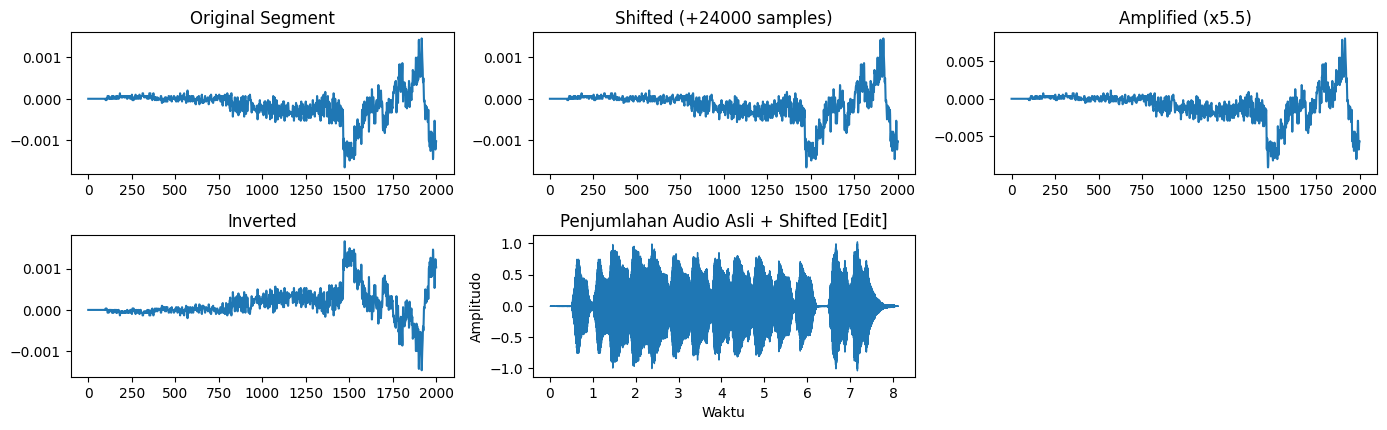

Original Audio:


Shifted:


Amplified:


Inverted:


Audio Asli + Shifted:


In [69]:
# Shifting (geser ke kanan 24000 sampel)
shifted = np.roll(segment, 24000)
shifted_audio = np.roll(audio, 24000)

# Amplifying (perbesar amplitudo)
amplified = np.clip(segment * 5.5, -1, 1)
amplified_audio = np.clip(audio * 5.5, -1, 1)

# Inverting (balik polaritas)
inverted = -segment
inverted_audio = -audio

# Penjumlahan audio asli + shifted
audio_sum = audio + shifted_audio

plt.figure(figsize=(14, 6))

plt.subplot(3, 3, 1)
plt.plot(segment)
plt.title("Original Segment")

plt.subplot(3, 3, 2)
plt.plot(shifted)
plt.title("Shifted (+24000 samples)")

plt.subplot(3, 3, 3)
plt.plot(amplified)
plt.title("Amplified (x5.5)")

plt.subplot(3, 3, 4)
plt.plot(inverted)
plt.title("Inverted")

plt.subplot(3, 3, 5)
librosa.display.waveshow(audio_sum, sr=sample_rate)
plt.title('Penjumlahan Audio Asli + Shifted [Edit]')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()

print("Original Audio:")
display(Audio(audio, rate=sample_rate))

print("Shifted:")
display(Audio(shifted_audio, rate=sample_rate))

print("Amplified:")
display(Audio(amplified_audio, rate=sample_rate))

print("Inverted:")
display(Audio(inverted_audio, rate=sample_rate))

print("Audio Asli + Shifted:")
display(Audio(audio_sum, rate=sample_rate))


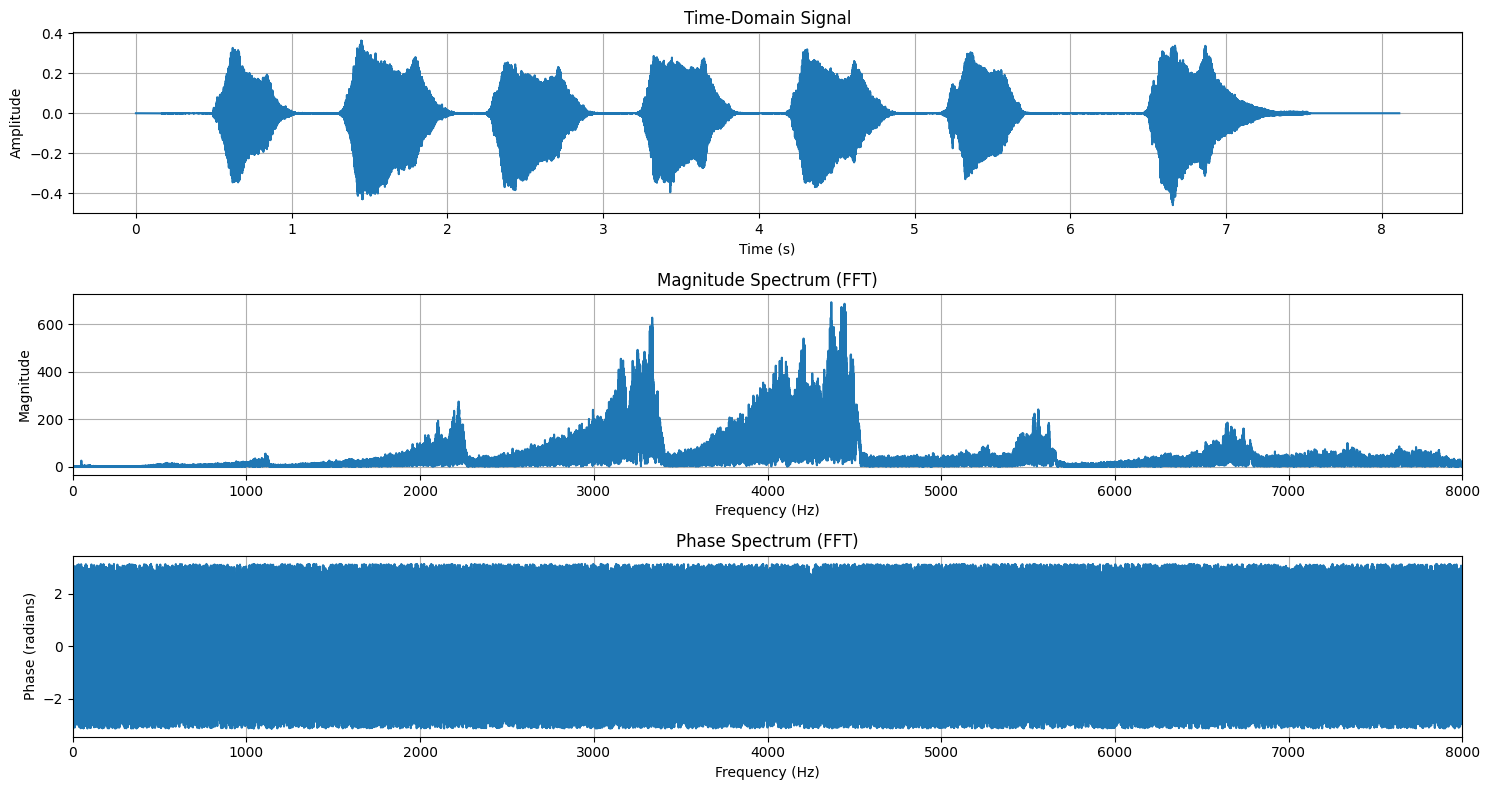

In [60]:
file_path = "/content/kitten-calling-for-mother-cute-meowing-sound-332671.wav"
y, sr = librosa.load(file_path, sr=None)

t = np.linspace(0, len(y) / sr, num=len(y))

N = len(y)
fft_vals = np.fft.rfft(y)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)
phase = np.angle(fft_vals)

plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(frequencies, magnitude)
plt.title("Magnitude Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 8000)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(frequencies, phase)
plt.title("Phase Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.xlim(0, 8000)
plt.grid(True)

plt.tight_layout()
plt.show()

# Operasi Dasar Untuk Citra

## Operasi Dasar yang Akan Dilakukan



*   Citra Negatif
*   Citra Berwarna Menjadi Grayscale
*   Brightening
*   Kontras
*   Aritmatika 2 Citra
*   Boolean
*   Operasi Geometri





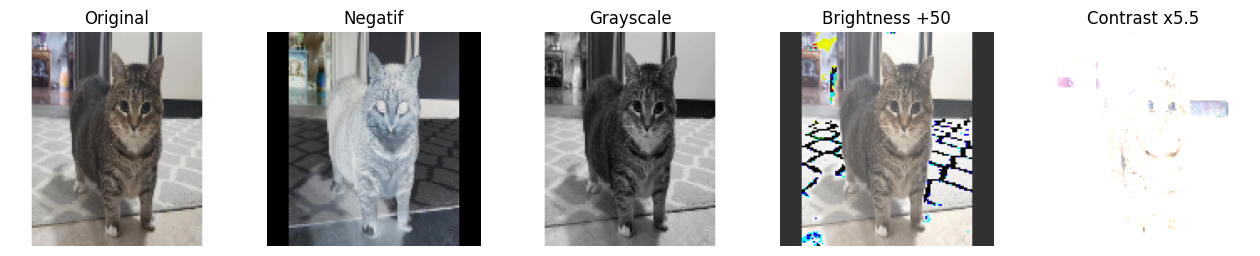

In [40]:
url = "https://d2ya09u1z2qlgr.cloudfront.net/public/storage/article/April2025/CiTMpRus3Tk7Rhj3LaTr.webp"
img_path = "/tmp/lenna.png"
urllib.request.urlretrieve(url, img_path)

# Baca dan ubah ke RGB
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (128, 128))

# Negatif: 255 - pixel
negatif = 255 - img

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


# brightening
bright = np.clip(img + 50, 0, 255).astype(np.uint8)

# kontras
contrast = np.clip(5.5 * img, 0, 255).astype(np.uint8)


# Visualisasi
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
axs[0].imshow(img); axs[0].set_title("Original"); axs[0].axis('off')
axs[1].imshow(negatif); axs[1].set_title("Negatif"); axs[1].axis('off')
axs[2].imshow(gray, cmap='gray'); axs[2].set_title("Grayscale"); axs[2].axis('off')
axs[3].imshow(bright); axs[3].set_title("Brightness +50"); axs[3].axis('off')
axs[4].imshow(contrast); axs[4].set_title("Contrast x5.5"); axs[4].axis('off')
plt.show()

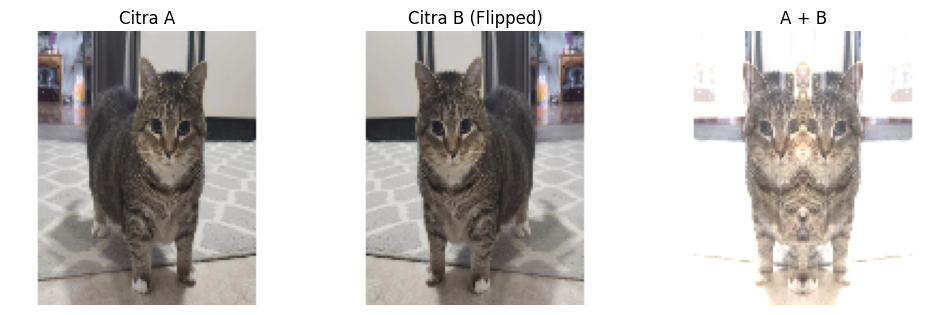

In [ ]:
# Operasi Aritmatika Dua Citra
img2 = cv2.flip(img, 1)
added_img = np.clip(img.astype(int) + img2.astype(int), 0, 255).astype(np.uint8)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img); plt.title("Citra A"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(img2); plt.title("Citra B (Flipped)"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(added_img); plt.title("A + B"); plt.axis('off')
plt.show()

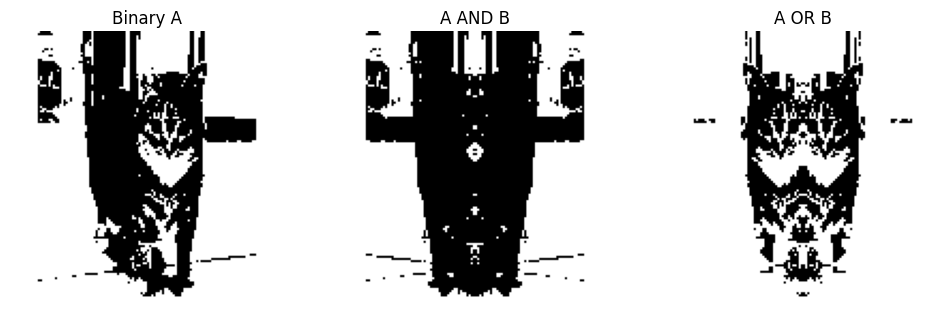

In [ ]:
# Operasi Boolean
_, bin1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY), 100, 255, cv2.THRESH_BINARY)

# AND & OR
bitwise_and = cv2.bitwise_and(bin1, bin2)
bitwise_or = cv2.bitwise_or(bin1, bin2)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(bin1, cmap='gray'); axs[0].set_title("Binary A"); axs[0].axis('off')
axs[1].imshow(bitwise_and, cmap='gray'); axs[1].set_title("A AND B"); axs[1].axis('off')
axs[2].imshow(bitwise_or, cmap='gray'); axs[2].set_title("A OR B"); axs[2].axis('off')
plt.show()


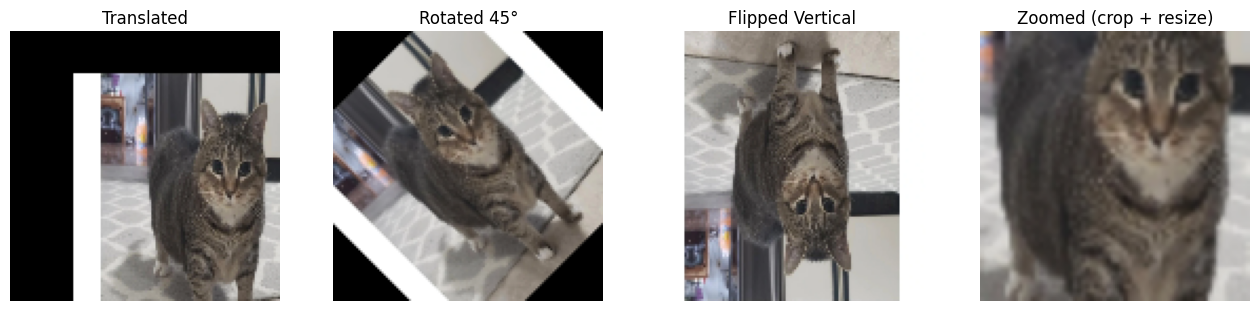

In [ ]:
# Operasi Geometri

# Translasi
M_trans = np.float32([[1, 0, 30], [0, 1, 20]])
translated = cv2.warpAffine(img, M_trans, (img.shape[1], img.shape[0]))

# Rotasi
center = (img.shape[1]//2, img.shape[0]//2)
M_rot = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M_rot, (img.shape[1], img.shape[0]))

# Zooming (crop tengah lalu resize)
h, w = img.shape[:2]
zoomed = cv2.resize(img[h//4:3*h//4, w//4:3*w//4], (w, h))

# Visualisasi
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(translated); axs[0].set_title("Translated"); axs[0].axis('off')
axs[1].imshow(rotated); axs[1].set_title("Rotated 45°"); axs[1].axis('off')
axs[2].imshow(cv2.flip(img, 0)); axs[2].set_title("Flipped Vertical"); axs[2].axis('off')
axs[3].imshow(zoomed); axs[3].set_title("Zoomed (crop + resize)"); axs[3].axis('off')
plt.show()


# Operasi Dasar yang telah Dilakukan Untuk Citra (Gambar)

1. Negatif

    Teknik: negative = 255 - image
    
    Fungsi: Membalik warna piksel terang menjadi gelap, dan sebaliknya.

2. Graysacle

    Teknik: cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    Fungsi: Mengonversi gambar berwarna menjadi intensitas cahaya abu-abu

3. Brightening

    Teknik: bright = cv2.convertScaleAbs(image, alpha=1, beta=50)
    
    Fungsi: Menambahkan nilai brightness secara global

4. Kontras
    Teknik: contrast = cv2.convertScaleAbs(image, alpha=1.5, beta=0)

    Fungsi: Meningkatkan perbedaan antara area terang dan gelap

5. Aritmatika Dua Citra
    Teknik: cv2.add(img1, img2) atau cv2.subtract(img1, img2)

    Fungsi: Penjumlahan atau pengurangan piksel dua gambar

6. Boolean
    Teknik: cv2.bitwise_and, bitwise_or, bitwise_not, bitwise_xor

    Fungsi: Operasi logika antar piksel (per bit)

7. Geometri (Translasi, Rotasi, Flipping, Zooming)
    Teknik:

    Translasi: cv2.warpAffine(...)

    Rotasi: cv2.getRotationMatrix2D + warpAffine

    Flipping: cv2.flip(image, flipCode)

    Zooming: cv2.resize(image, None, fx, fy)

    Fungsi: Transformasi posisi dan ukuran objek

# Refleksi Pribadi

Sumber yang membantu saya dalam pengerjaan tugas ini ialah :

1. Untuk Operasi Dasar Sinyal saya mengikuti apa yang telah dibagikan di github ( https://github.com/virgantara/Digital-Signal-Processing-Course/blob/master/week03/pengolahan-sinyal-digital-week-03.ipynb ) dan menambahkan file waf untuk mengujinya.

2. Sedangkan untuk Operasi Dasar pada Citra, saya  mendapatkan sumber dari https://informatika.stei.itb.ac.id/~rinaldi.munir/Citra/2019-2020/06-Operasi-operasi-dasar-pengolahan-citra.pdf yang menjelaskan terkait Operasi-operasi Dasar pengolahan citra.

3. Kemudian jika ada error dalam pemrosesan, saya memakai gemini bawaan dari google colab untuk fixing errornya.